In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
import glob

In [2]:
def gaussian(h, w, sigma):
    gaussian_filter = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            gaussian_filter[i, j] = \
            math.exp(-((i-(h-1)/2)**2 + (j-(w-1)/2)**2) / (2 * sigma**2))
    return gaussian_filter

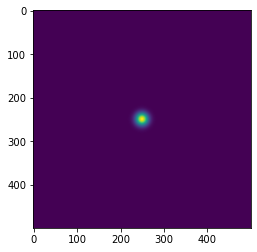

In [3]:
g = gaussian(500, 500, 10)
plt.imshow(g)

In [4]:
def ideal(h, w, sigma):
    ideal_filter = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            if math.sqrt((i-(h-1)/2)**2 + (j-(w-1)/2)**2) <= sigma:
                ideal_filter[i, j] = 1
    return ideal_filter

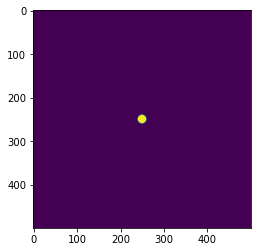

In [5]:
i_filter = ideal(500, 500, 10)
plt.imshow(i_filter)

In [6]:
def convolution(channel, f):
    h, w = channel.shape
    chan = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            chan[i, j] = channel[i, j] * (-1)**(i + j)
            
    fft = np.fft.fft2(chan)
    con = fft * f
    ifft = np.real(np.fft.ifft2(con))
    
    result = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            result[i, j] = ifft[i, j] * (-1)**(i + j)
            
    return result

In [7]:
def clipping(np_array):
    np_array[np_array > 255] = 255
    np_array[np_array < 0] = 0

In [8]:
def hybrid(img1, img2, Filter, sigma):
    h, w, _ = img1.shape
    low_filter = Filter(h, w, sigma)
    high_filter = 1 - low_filter
    
    result = np.zeros((img1.shape))
    for c in range(3):
        result[:, :, c] = convolution(img1[:, :, c], low_filter)
        result[:, :, c] += convolution(img2[:, :, c], high_filter)
    
    clipping(result)
    return result

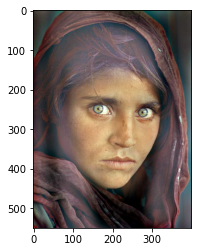

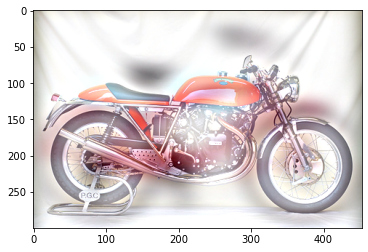

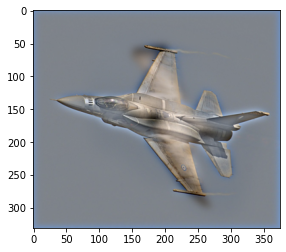

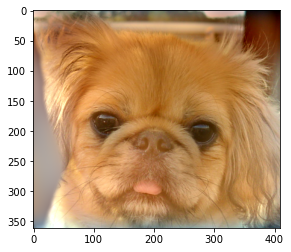

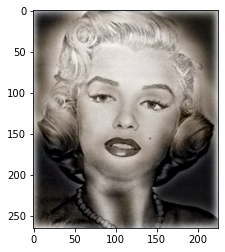

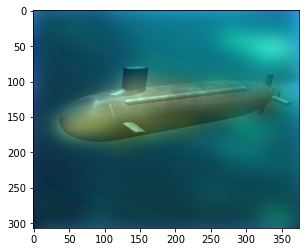

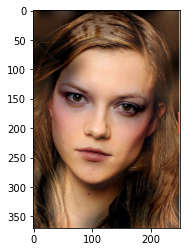

In [9]:
# hybrid images by gaussian
images = glob.glob("hw2_data/task1,2_hybrid_pyramid/*")
sigma = [5, 5, 10, 3, 7, 4, 5]

for i in range(len(images)//2):
    img1 = cv2.imread(images[2 * i])
    img2 = cv2.imread(images[2 * i + 1])
    
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]), interpolation = cv2.INTER_NEAREST)
        
    hybrid_img = hybrid(img1, img2, gaussian, sigma[i])
    
    # show images
    plt.imshow(cv2.cvtColor((hybrid_img).astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite(str(i) + 'g.jpg', hybrid_img)


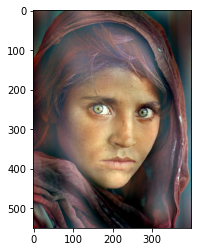

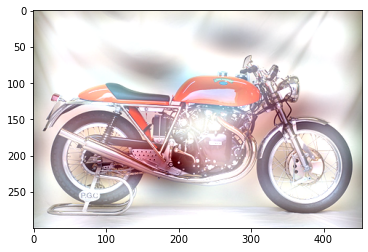

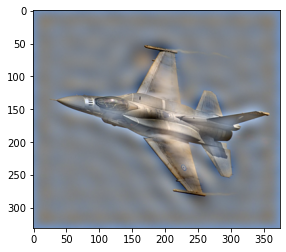

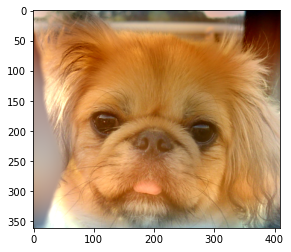

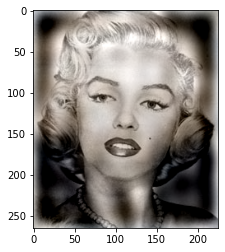

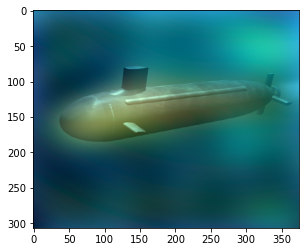

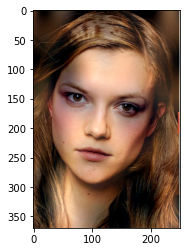

In [10]:
# hybrid images by ideal
for i in range(len(images)//2):
    img1 = cv2.imread(images[2 * i])
    img2 = cv2.imread(images[2 * i + 1])
    
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]), interpolation = cv2.INTER_NEAREST)
        
    hybrid_img = hybrid(img1, img2, ideal, sigma[i])
    
    # show images
    plt.imshow(cv2.cvtColor((hybrid_img).astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite(str(i) + 'i.jpg', hybrid_img)

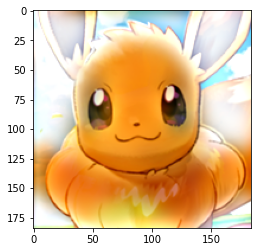

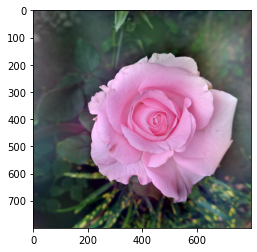

In [11]:
# our data
images = glob.glob("hw2_data/our_data/*")
sigma = [4, 3]

for i in range(len(images)//2):
    img1 = cv2.imread(images[2 * i])
    img2 = cv2.imread(images[2 * i + 1])
    
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]), interpolation = cv2.INTER_NEAREST)
        
    hybrid_img = hybrid(img1, img2, gaussian, sigma[i])
    
    # show images
    plt.imshow(cv2.cvtColor((hybrid_img).astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite(str(i) + 'g.jpg', hybrid_img)

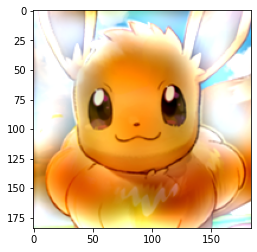

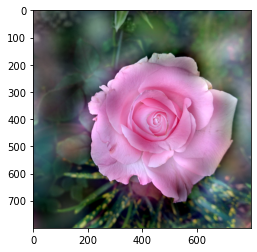

In [12]:
# our data
images = glob.glob("hw2_data/our_data/*")
sigma = [4, 7]

for i in range(len(images)//2):
    img1 = cv2.imread(images[2 * i])
    img2 = cv2.imread(images[2 * i + 1])
    
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]), interpolation = cv2.INTER_NEAREST)
        
    hybrid_img = hybrid(img1, img2, ideal, sigma[i])
    
    # show images
    plt.imshow(cv2.cvtColor((hybrid_img).astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.show()
    cv2.imwrite(str(i) + 'i.jpg', hybrid_img)